# Importing Required Packages

In [0]:
import pandas as pd
import numpy as np
import json


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack


import matplotlib.pyplot as plt
np.random.seed(0)

In [0]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [0]:
df['hds']=df['headline']+df['short_description']

In [8]:
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stemmer = PorterStemmer()

In [0]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    new1=''.join(nopunc)
    new2=[stemmer.stem(word) for word in new1]
    new3=''.join(new2)
    return[word for word in new3.split()if word.lower()not in stopwords.words('english') ]

In [12]:
df['hds'].head()

0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
2    Hugh Grant Marries For The First Time At Age 5...
3    Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4    Julianna Margulies Uses Donald Trump Poop Bags...
Name: hds, dtype: object

In [13]:
df['hds'].head(5).apply(text_process)

0    [2, Mass, Shootings, Texas, Last, Week, 1, TVS...
1    [Smith, Joins, Diplo, Nicky, Jam, 2018, World,...
2    [Hugh, Grant, Marries, First, Time, Age, 57The...
3    [Jim, Carrey, Blasts, Castrato, Adam, Schiff, ...
4    [Julianna, Margulies, Uses, Donald, Trump, Poo...
Name: hds, dtype: object

In [0]:
title_tr, title_te, category_tr, category_te = train_test_split(df['hds'],df['category'])
title_tr, title_de, category_tr, category_de = train_test_split(title_tr,category_tr)

In [15]:
print("Training    : ",len(title_tr))
print("Developement: ",len(title_de),)
print("Testing     : ",len(title_te))

Training    :  112979
Developement:  37660
Testing     :  50214


In [0]:
from wordcloud import WordCloud

<Figure size 432x288 with 0 Axes>

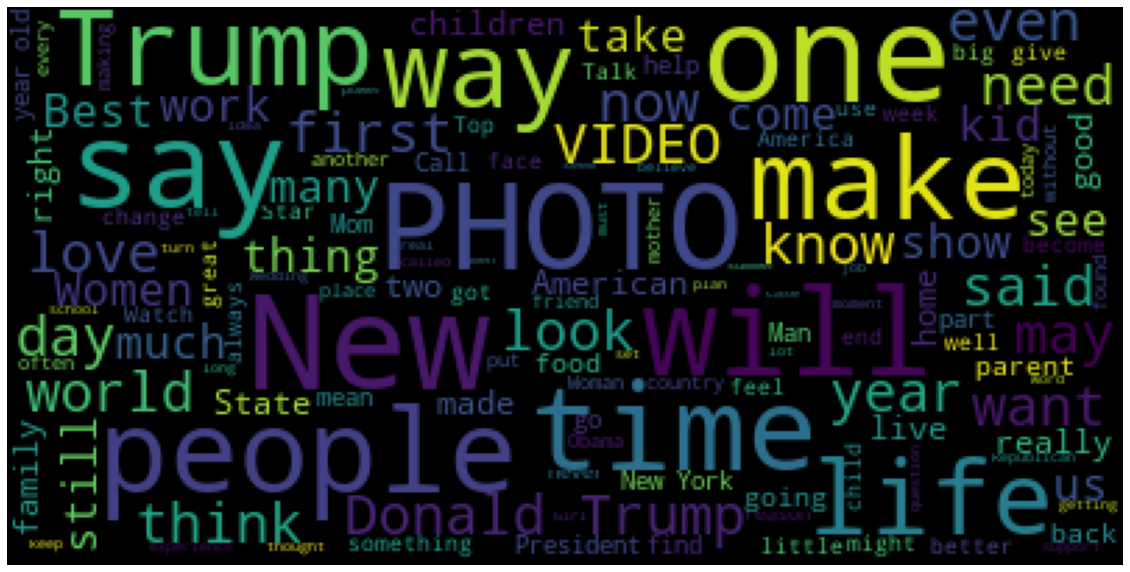

In [19]:
text = " ".join(title_tr)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="Black",
    max_words=len(text),
    max_font_size=50,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('popular')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

# Data Preprocessing
# Vectorizing the data using Bag of words (BOW)

In [0]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

In [39]:
vectorizer.fit(iter(title_tr))
Xtr = vectorizer.transform(iter(title_tr))
Xde = vectorizer.transform(iter(title_de))
Xte = vectorizer.transform(iter(title_te))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
encoder = LabelEncoder()
encoder.fit(category_tr)
Ytr = encoder.transform(category_tr)
Yde = encoder.transform(category_de)
Yte = encoder.transform(category_te)


In [41]:
#Feature Reduction


print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xde = selection.transform(Xde)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])


Number of features before reduction :  126219
Number of features after reduction :  3380


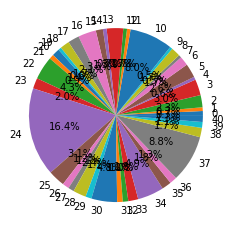

In [42]:
#Sampling the data


labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


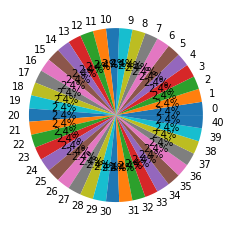

In [43]:
sm = SMOTE(random_state=42)
Xtr, Ytr = sm.fit_sample(Xtr, Ytr)
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()
